# MNIST数据集
- 这是一组由美国高中生和人口调查局员工手写的70000个数字的图片。 每张图像都用其代表的数字标记。
- fetch_mldata()函数已经被弃用，现在使用的是frtch_openml()，但是这个函数返回的结果是无序的，所以需要手动排序

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
import numpy as np

In [4]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:,1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:,1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [5]:
mnist.target = mnist.target.astype(np.int8)  # 把标签转为整形

In [6]:
sort_by_target(mnist)

In [7]:
mnist.data, mnist.target

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [8]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([0, 0, 0, ..., 9, 9, 9], dtype=int8),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  'pixel52',
  'p

In [9]:
X, y = mnist['data'], mnist['target']

In [10]:
X.shape, y.shape

((70000, 784), (70000,))

- 一共有7万张图片，每张图片是28*28像素，所以是784个特征，特征值代表像素点强度，0-255（由白到黑）

In [11]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()
y[36000]

In [12]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

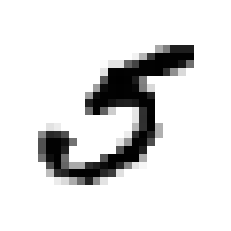

5

In [13]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()
y[36000]

In [82]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')

In [87]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")

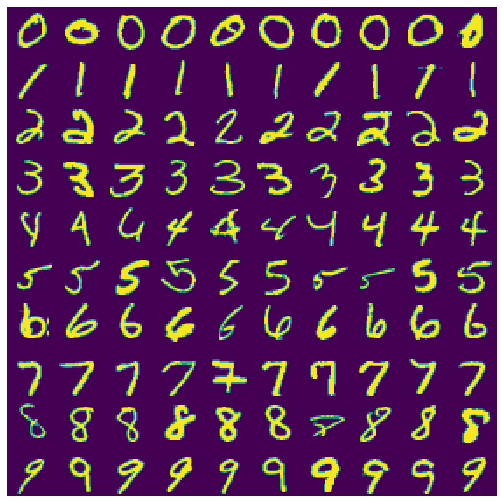

In [88]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
# save_fig("more_digits_plot")
plt.show()

In [18]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### 将训练集打乱，保证随机性

In [19]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train

array([1, 8, 9, ..., 7, 9, 0], dtype=int8)

In [20]:
shuffle_index

array([10674, 49104, 55184, ..., 44526, 54715,  1022])

# 先训练一个二元分类器

In [21]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5, y_test_5

(array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]))

#### 使用随机梯度下降分类器
- 这个分类器的优势是， 能够有效处理非常大型的数据集
- 这部分是因为SGD独立处理训练实例， 一次一个

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=5, tol=-np.infty)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [23]:
sgd_clf.predict(np.mat(some_digit))   # 使用前面示例的数据预测，结果是对的

array([ True])

# 性能评估

### 交叉验证

In [24]:
# 分层抽样
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [25]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_folds = X_train[test_index]
    y_test_folds = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

0.9634
0.9644
0.95285


In [26]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [27]:
from sklearn.model_selection import cross_val_score
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.913  , 0.909  , 0.90695])

- 虽然识别率达到95%，但实际上如果每次都直接猜测数字不是5，那估计也会有90%左右的正确率，所以这个不能算得上是合理的评估方式
- 这说明准确率通常无法成为分类器的首要性能指标，特别是当你处理偏斜数据集（skewed dataset）的时候（即某些类比其他类更为频繁）。

### 混淆矩阵
-  总体思路就是统计A类别实例被分成为B类别的次数。

In [28]:
# 也是实现交叉验证，但返回的不是分数，二是每个折叠的预测
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53106,  1473],
       [  914,  4507]], dtype=int64)

- 精度
>$$ 精度=\frac{TP}{TP+FP} $$
>TP是真正类的数量，FP是假正类的数量

- 召回率
>$$ 召回率=\frac{TP}{TP+FN} $$
>FN是假负类的数量

![](img/3-2.png)

#### sklearn内置了多种分类器指标，精度和召回率也是其中之一

In [30]:
from sklearn.metrics import precision_score, recall_score

In [31]:
precision_score(y_train_5, y_train_pred)

0.7536789297658862

In [32]:
recall_score(y_train_5, y_train_pred)

0.8313964213244789

- 到这里再看这个二分类器的效果就没有那么夸张了，只有77%的正确率，80%的5被检测出来了

#### F1分数
- 将精度和召回率组合成一个单独的指标，称作F1分数
$$ F_1=\frac{2}{\frac{1}{精度} +\frac{1}{召回率}}=2X\frac{精度X召回率}{精度+召回率}=\frac{TP}{TP+\frac{FN+FP}{2}} $$

In [33]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7906324006666082

- F1分数对那些具有相近的精度和召回率的分类器更为有利。这不一定能一直符合你的期望：在某些情况下，你更关心的是精度，而另一些情况下，你可能真正关心的是召回率。

#### 精度/召回率权衡
- SGDClassifier分类决策
>对于每个实例，它会基于决策函数计算出一个分值，如果该值大于阈值，则将该实例判为正类，否则便将其判为负类。 

![](img/3-3.png)

- Scikit-Learn不允许直接设置阈值，但是可以访问它用于预测的决策分数。不是调用分类器的predict（）方法，而是调用decision_function（）方法，这个方法返回每个实例的分数，然后就可以根据这些分数，使用任意阈值进行预测了

In [34]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([34425.06990697])

In [35]:
threshould = 0
y_some_digit_pred = (y_scores > threshould)
y_some_digit_pred

array([ True])

In [36]:
threshould = 200000
y_some_digit_pred = (y_scores > threshould)
y_some_digit_pred

array([False])

#### 获取训练集中所有的示例分数

In [37]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_pred, cv=3, method='decision_function')

In [38]:
y_scores

array([ -389830.56273013,   188797.40626396,  -406832.76180075, ...,
        -192917.80850043,  -242051.00982975, -2047872.98352178])

In [39]:
from sklearn.metrics import precision_recall_curve

In [40]:
precisions, recalls, threshoulds = precision_recall_curve(y_train_5, y_scores)

In [41]:
precisions, recalls, threshoulds

(array([0.09124419, 0.0912289 , 0.09123043, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-2581426.29589367, -2578708.02498836, -2578483.36938474, ...,
         1781615.03661704,  1795022.68024602,  2035125.9120225 ]))

(-1200000, 1200000)

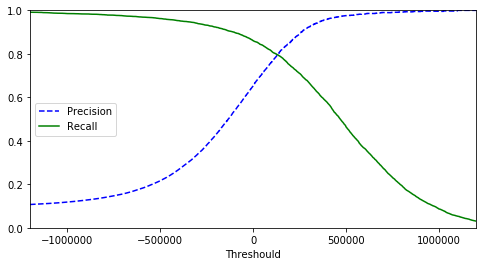

In [42]:
def plot_precision_recall_vs_threshould(precisions, recalls, threshoulds):
    plt.plot(threshoulds, precisions[:-1], 'b--', label='Precision')
    plt.plot(threshoulds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshould')
    plt.legend(loc='center left')
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshould(precisions, recalls, threshoulds)
plt.xlim([-1200000, 1200000])

In [43]:
y_train_pred_90 = (y_scores > 250000)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.8927078495123084
0.7090942630510976


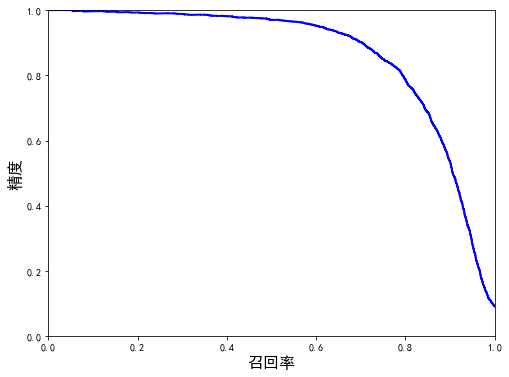

In [44]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=2)
    plt.xlabel('召回率', fontsize=16)
    plt.ylabel('精度', fontsize=16)
    plt.axis([0,1,0,1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

### ROC曲线
- 还有一种经常与二元分类器一起使用的工具，叫作受试者工作特征曲线
- 它与精度/召回率曲线非常相似，但绘制的不是精度和召回率，而是真正类率（召回率的另一名称）和假正类率（FPR） 
- FPR是被错误分为正类的负类实例比率，它等于1减去真负类率（TNR）

In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, threshoulds = roc_curve(y_train_5, y_scores)

In [46]:
fpr, tpr, threshoulds

(array([0.        , 0.        , 0.        , ..., 0.98922663, 0.98922663,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 5.40490684e-02, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([ 2035126.9120225 ,  2035125.9120225 ,  1096511.81564929, ...,
        -2578708.02498836, -2581426.29589367, -5541955.6883435 ]))

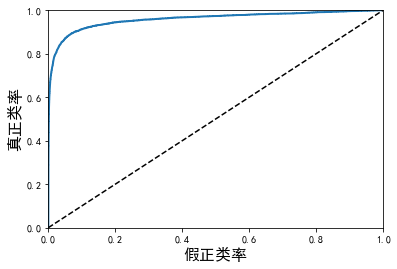

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('假正类率', fontsize=16)
    plt.ylabel('真正类率', fontsize=16)

plot_roc_curve(fpr, tpr)

- 同样这里再次面临一个折中权衡：召回率（TPR）越高，分类器产生的假正类（FPR）就越多。虚线表示纯随机分类器的ROC曲线；一个优秀的分类器应该离这条线越远越好（向左上角）

#### 比较分类器的方法是测量曲线下面积（AUC）完美的分类器的ROC AUC等于1，而纯随机分类器的ROC AUC等于0.5

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9588514737174569

- 由于ROC曲线与精度/召回率（或PR）曲线非常相似，因此你可能会问如何决定使用哪种曲线。有一个经验法则是，当正类非常少见或者你更关注假正类而不是假负类时，你应该选择PR曲线，反之则是ROC曲线。
- 看前面的ROC曲线图（以及ROC AUC分数），你可能会觉得分类器真不错。但这主要是因为跟负类（非5）相比，正类（数字5）的数量真得很少。相比之下，PR曲线清楚地说明分类器还有改进的空间（曲线还可以更接近右上角）。

### 使用随机深林分类器

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)

In [58]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                    cv=3, method='predict_proba')

In [59]:
forest_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [60]:
y_scores_forset = y_probas_forest[:,1]

In [61]:
fpr_forest, tpr_forest, threshoulds_forest = roc_curve(y_train_5, y_scores_forset)

In [62]:
fpr_forest, tpr_forest, threshoulds_forest

(array([0.00000000e+00, 0.00000000e+00, 1.83220653e-05, 1.28254457e-04,
        5.49661958e-04, 1.15429011e-03, 2.85824218e-03, 6.52265523e-03,
        1.62150278e-02, 4.71243519e-02, 1.67225490e-01, 1.00000000e+00]),
 array([0.        , 0.26526471, 0.47980077, 0.63290906, 0.73602656,
        0.8171924 , 0.87585316, 0.92326139, 0.95222284, 0.97860173,
        0.99354363, 1.        ]),
 array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

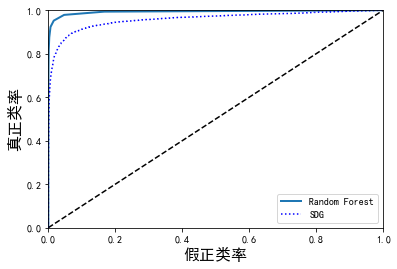

In [64]:
plot_roc_curve(fpr_forest, tpr_forest, label='Random Forest')
plt.plot(fpr, tpr, 'b:', label='SDG')
plt.legend(loc='lower right')

In [65]:
roc_auc_score(y_train_5, y_scores_forset)

0.9930085672402169

In [68]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [70]:
precision_score(y_train_5, y_train_pred_forest), recall_score(y_train_5, y_train_pred_forest)

(0.9859781882929001, 0.8171923999262128)

# 多类别分类器

- 一些算法可以直接处理多分类问题，比如随机森林分类器和朴素贝叶斯分类器
- 严格的二元分类器（比如支持向量机和线性分类器）可以通过不同的策略实现多分类的目的
>- 例如， 要创建一个系统将数字图片分为10类（从0到9），一种方法是训练10个二元分类器，每个数字一个（0-检测器、1-检测器、2-检测器，等等，以此类推）。然后，当你需要对一张图片进行检测分类时，获取每个分类器的决策分数， 哪个分类器给分最高，就将其分为哪个类。这称为一对多（OvA）策略（也称为one-versus-therest）。
>- 另一种方法是，为每一对数字训练一个二元分类器：一个用于区分0和1，一个区分0和2，一个区分1和2，以此类推。这称为一对一（OvO）策略。如果存在N个类别，那么这需要训练N×（N-1）÷2个分类器。对于MNIST问题，这意味着要训练45个二元分类器！当需要对一张图片进行分类时，你需要运行45个分类器来对图片进行分类，最后看哪个类别获胜最多。OvO的主要优点在于，<mark>每个分类器只需要用到部分训练集对其必须区分的两个类别进行训练。</mark>

- 有些算法（例如支持向量机分类器）在<font color='red'>数据规模扩大</font>时表现糟糕，因此对于这类算法，OvO是一个优先的选择，由于在较小训练集上分别训练多个分类器比在大型数据集上训练少数分类器要快得多。但是对<font color='red'>大多数二元分类器</font>来说，OvA策略还是更好的选择

#### 自动使用OVA策略

In [89]:
# 这里实际是使用了OVA策略（除了SVM，他是使用OVO策略）
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [96]:
sgd_clf.predict(np.mat(some_digit))

array([5], dtype=int8)

- 训练分类器时，目标类别的列表会存储在classes_这个属性中， 按值的大小排序。

In [103]:
# 查看10个分类器的分数
some_digit_scores = sgd_clf.decision_function([some_digit])
print(np.argmax(some_digit_scores))
print(some_digit_scores)
print(sgd_clf.classes_)

5
[[-116296.13858718 -475078.95433654 -227067.06152069 -181442.14397974
  -461613.7035882    89483.86549766 -756244.49268351 -349622.50236668
  -478951.34839848 -592026.06904925]]
[0 1 2 3 4 5 6 7 8 9]


#### 强制使用OVO策略
>- 如果想要强制Scikit-Learn使用一对一或者一对多策略，可以使用OneVsOne Classifier OneVsRestClassifier类。只需要创建一个实例，然后将二元分类器传给其构造函数。

In [109]:
from sklearn.multiclass import OneVsOneClassifier

In [110]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [111]:
ovo_clf.predict(np.mat(some_digit))

array([5], dtype=int8)

In [120]:
len(ovo_clf.estimators_)

45

#### 随机森林直接可以实现多分类，无需OVO或者OVA

In [121]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [122]:
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [123]:
forest_clf.predict_proba([some_digit])

array([[0. , 0.1, 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

##### 评估分类器，使用交叉验证

In [124]:
print(cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy'))
print(cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring='accuracy'))

[0.86082783 0.82689134 0.86858029]
[0.91666667 0.91499575 0.91928789]


- 貌似SDG通过OVO策略准确率高好多

In [125]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.93931214, 0.94229711, 0.94139121])

- 可以通过简单缩放提高准确率

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [127]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [128]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [130]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.91126775, 0.90944547, 0.90928639])

In [131]:
cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.91666667, 0.91499575, 0.91928789])

In [132]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.93931214, 0.94229711, 0.94139121])

<small>这里只对SGD的准确度有所提高</small>

### 错误分析
>先试看混淆矩阵，查看效果

In [133]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [135]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5507,    3,   18,   20,    5,   58,  109,    9,  156,   38],
       [   1, 6315,   39,   22,    8,   43,   32,   19,  194,   69],
       [  46,   33, 4932,  152,   53,   28,  244,  138,  287,   45],
       [  36,   13,  155, 4810,   13,  155,   62,   85,  592,  210],
       [  12,   19,   32,   26, 4650,   19,  174,   55,  184,  671],
       [  79,   21,   31,  308,   57, 3834,  183,   47,  667,  194],
       [  22,    8,   22,   15,   10,   98, 5684,    9,   45,    5],
       [  24,   12,   51,   22,   26,   12,   13, 5579,   69,  457],
       [  30,  105,   85,  250,   42,  288,   96,   86, 4400,  469],
       [  21,   16,   20,   66,   78,   22,   12,  195,  104, 5415]],
      dtype=int64)

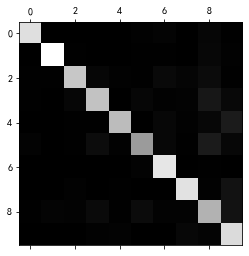

In [146]:
# 使用matshow()来查看混淆矩阵
plt.matshow(conf_mx, cmap=plt.cm.gray)

>混淆矩阵看起来很不错，因为大多数图片都在主对角线上，这说明它们被正确分类。数字5看起来比其他数字稍稍暗一些，这可能意味着数据集中数字5的图片较少，也可能是分类器在数字5上的执行效果不如在其他数字上好。实际上，你可能会验证这两者都属实。

##### 首先，你需要将混淆矩阵中的每个值除以相应类别中的图片数量，这样你比较的就是错误率而不是错误的绝对值（后者对图片数量较多的类别不公平） 

In [153]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
# 用0填充正确元素，错误分析更关心错误
np.fill_diagonal(norm_conf_mx, 0)

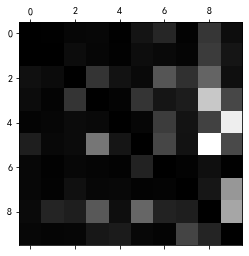

In [159]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

>1. 数字8和9偏亮，说明会经常与其他数字混淆
>2. 数字3和数字5比较容易混淆

In [160]:
cl_a, cl_b = 3, 5

In [161]:
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

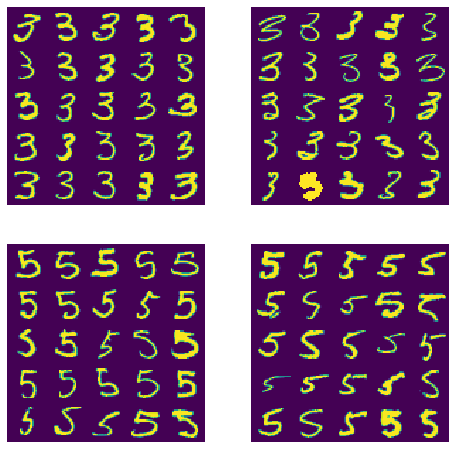

In [167]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

>数字3和数字5之间的主要区别是在于连接顶线和下方弧线的中间那段小线条的位置。 果你写的数字3将连接点略往左移，分类器就可能将其分类为数字5，反之亦然。换言之，这个分类器对图像移位和旋转非常敏感。因此，减少数字3和数字5混淆的方法之一，就是对图片进行预处理，确保它们位于中心位置并且没有旋转。这也同样有助于减少其他错误。

# 多标签分类
- 到目前为止，每个实例都只会被分在一个类别里。而在某些情况下，你希望分类器为每个实例产出多个类别。例如，人脸识别的分类器：如果在一张照片里识别出多个人怎么办？当然，应该为识别出来的每个人都附上一个标签。假设分类器经过训练，已经可以识别出三张脸——爱丽丝、鲍勃和查理，那么当看到一张爱丽丝和查理的照片时，它应该输出[1， 0， 1]（意思是“是爱丽丝，不是鲍勃，是查理”）这种输出多个二元标签的分类系统称为多标签分类系统。

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()

In [174]:
knn_clf.fit(X_train, y_multilabel)    # 训练出两个标签

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [175]:
knn_clf.predict([some_digit])

array([[False,  True]])

- 评估多标签分类器的方法很多，如何选择正确的度量指标取决于你的项目。比如方法之一是测量每个标签的F1分数（或者是之前讨论过的任何其他二元分类器指标），然后简单地平均。下面这段代码计算所有标签的平均F1分数

In [176]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)

In [181]:
print(f1_score(y_multilabel, y_train_knn_pred, average='macro'))
print(f1_score(y_multilabel, y_train_knn_pred, average='weighted'))

0.978007392578192
0.9793609781040743


<small>跑了快40分钟，kNN真可怕</small>

# 多输出分类
>- 简单来说， 它是多标签分类的泛化， 其标签也可以是多种类别的（比如它可以有两个以上可能的值）

In [184]:
noise = np.random.randint(0, 100, (len(X_train), 784))    # 噪声

In [191]:
noise.min(), noise.max(), noise.shape

(0, 99, (60000, 784))

In [193]:
X_train_mod = X_train + noise    # 训练集特诊加入噪声

In [194]:
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise    # 测试集特征加入噪声

In [196]:
y_train_mod = X_train
y_test_mod = X_test     # 未加入噪声的数据集，（不直接使用原来的数据集，以便后续还可以使用原始数据）

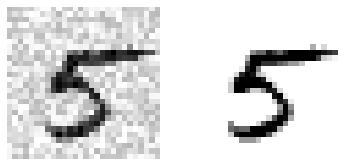

In [197]:
some_index = 5500     # 随机选取测试索引
plt.subplot(121); plot_digit(X_test_mod[some_index])     # 加入噪声的数据
plt.subplot(122); plot_digit(y_test_mod[some_index])     # 原始干净的数据

- 这个模型好像是用来清除噪声的

In [198]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

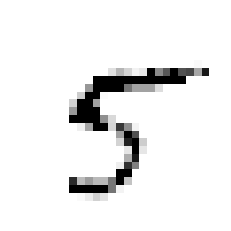

In [199]:
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)